<a href="https://colab.research.google.com/github/JSRV18/Dinosaurio-repository/blob/main/Interferometr%C3%ADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pint
!pip install pint uncertainties
import uncertainties
from uncertainties import ufloat
import pint as pint
ureg=pint.UnitRegistry(auto_reduce_dimensions=True)
Measurement=ureg.Measurement
Quantity=ureg.Quantity

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 2.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [142]:
xd_N = np.arange(2, 23)

d_xd = np.array([1, 1.5, 1.8, 2, 2.3, 2.7, 3, 3.3, 3.8, 4.1, 4.3, 4.8, 5, 5.2, 5.7, 5.9, 6.2, 6.6, 7, 7.1, 7.4])

xd_N

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22])

In [114]:
def ajuste_l(x, m, b):
  return x*m + b

from scipy.optimize import curve_fit

popt, pcov = curve_fit(ajuste_l, xd_N, d_xd)

In [60]:
lamb = popt[0]*2000

errlamb = np.sqrt(np.diag(pcov))[0]*2000

lamb, errlamb

lamb = ufloat(lamb, errlamb) * ureg.nm
lamb

<Quantity(642.078+/-6.437, 'nanometer')>

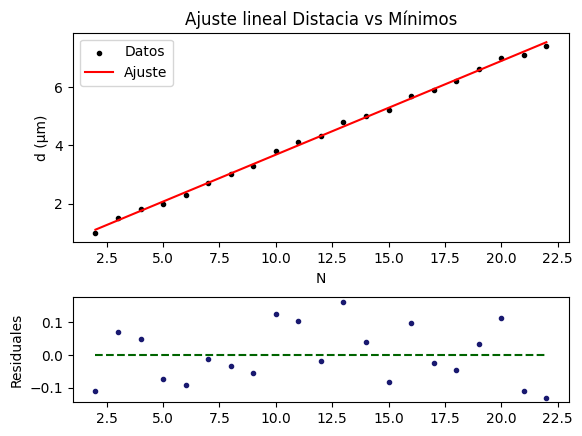

In [73]:
ymodelo = ajuste_l(xd_N, *popt)
r = d_xd - ymodelo

fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 0.5]})
ax[0].scatter(xd_N, d_xd, c='k', label='Datos', marker = '.')
ax[0].plot(xd_N,ymodelo, c='r', label='Ajuste')
ax[0].legend()
ax[0].set_ylabel('d (µm)')
ax[0].set_xlabel('N')
ax[0].set_title('Ajuste lineal Distacia vs Mínimos')
ax[1].scatter(xd_N, r, c='midnightblue', marker = '.')
ax[1].set_ylabel('Residuales')
ax[1].plot(xd_N, [0]*len(xd_N), linestyle='--', c = 'darkgreen')
plt.subplots_adjust(hspace=0.35)
plt.show()

In [140]:
lamb = Quantity(lamb, 'nm')
lamb0 = Quantity(632.8, 'nm')
theta3 = Quantity([90, 87, 84, 81, 77], 'degree')
theta3 = theta3.to('radian')

N_th = np.array([8, 7, 7, 7, 6])
t = Quantity(0.7, 'mm')
n_V = ((2*t - N_th*lamb0)*(1-np.cos(theta3)))/(2*t*(1-np.cos(theta3))-N_th*lamb0)

np.round(n_V,5)

Magnitude,[1.0 1.00018 1.00037 1.00059 1.00079]
Units,dimensionless


In [141]:
np.round(np.mean(n_V),5), np.round(np.std(n_V),5)

(<Quantity(1.00038, 'dimensionless')>, <Quantity(0.00028, 'dimensionless')>)

In [64]:
P = Quantity([0, 18, 24, 30.5, 39, 44, 47.5, 49], 'cmHg')

N_p = np.array([5, 10, 14, 18, 22, 26, 29, 32])

In [65]:
delta_p = P[-1] - P[0]

t_v = Quantity(3.1, 'mm')

m = delta_p/N_p[-1]

n = P*(lamb0/(2*t_v*m)) +1

n

Magnitude,[1.0 1.0011997788018434 1.0015997050691243 1.0020329585253456 1.0025995207373273 1.0029327926267282 1.0031660829493088 1.003266064516129]
Units,dimensionless


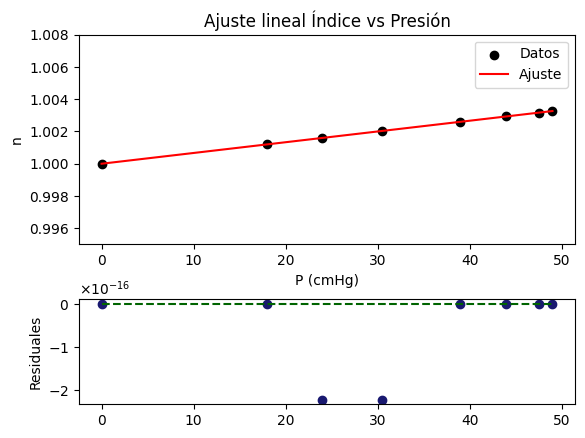

In [113]:
popt_n , pcov_n = curve_fit(ajuste_l, P.m, n.m)


ymodelop = ajuste_l(P.m, *popt_n)
r = n.m - ymodelop

fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 0.5]})
ax[0].scatter(P.m, n.m, c='k', label='Datos', marker = 'o')
ax[0].plot(P.m,ymodelop, c='r', label='Ajuste')
ax[0].legend()
ax[0].set_ylim(0.995, 1.008)
ax[0].set_ylabel('n')
ax[0].set_xlabel('P (cmHg)')
ax[0].set_title('Ajuste lineal Índice vs Presión')
ax[1].scatter(P.m, r, c='midnightblue', marker = 'o')
ax[1].set_ylabel('Residuales')
ax[1].plot(P.m, [0]*len(P.m), linestyle='--', c = 'darkgreen')
import matplotlib.ticker as ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((0, -16))
ax[1].yaxis.set_major_formatter(formatter)
plt.subplots_adjust(hspace=0.35)
plt.show()

In [87]:
m_p = popt_n[0]
err_m_p = np.sqrt(np.diag(pcov_n))[0]

m_P = ufloat(m_p, err_m_p) * 1/ureg.cmHg
m_P

<Quantity((6.66544+/-0.00000)e-05, '1 / centimeter_Hg')>

In [88]:
b_p = popt_n[1]

err_b_p = np.sqrt(np.diag(pcov_n))[1]

b_P = ufloat(b_p, err_b_p)
b_p

np.float64(1.0)

In [139]:
n_atm = m_P*Quantity(76, 'cmHg') + b_P

n_atm

<Quantity(1.00507+/-0.00000, 'dimensionless')>